# Preprocessing and filtering of ETF data

In this notebook the ETF data will be imported, analyzed and filtered.

We change the daily data into weekly data from Wednesday-Tuesday and change the returns from USD to EUR.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from currency_converter import CurrencyConverter
from datetime import date

## 1. Importing the Data

Here we want to have weekly data on adjusted price and volume traided from the 18-01-06 to the 11-12-19 (Wednesdays) for the 1867 ETFs. 

### 1.1 Dataframe for Adjusted Price and Return

We start by making a dataframe with the weekly adjusted price.

**Import daily data.** 

In [3]:
df_adj = pd.read_csv("ETFdataNewer.csv",index_col=0)
df_adj.tail(5)

,ALTS.Volume,ALTS.Adjusted,ALTY.Volume,ALTY.Adjusted,AMJ.Volume,AMJ.Adjusted,AMJL.Volume,AMJL.Adjusted,AMLP.Volume,AMLP.Adjusted,...,ZROZ.Volume,ZROZ.Adjusted,ZSL.Volume,ZSL.Adjusted,ZSML.Volume,ZSML.Adjusted,ALTS.Volume.1,ALTS.Adjusted.1,ALTY.Volume.1,ALTY.Adjusted.1
29/04/2020,18.0,34.4617,10754.0,10.3300,3948558.0,13.91,NaN,NaN,30774052.0,5.21,...,100061.0,182.23,22212.0,29.2700,NaN,NaN,18.0,34.4617,10754.0,10.3300
30/04/2020,967.0,34.1741,14769.0,10.1545,7302638.0,13.65,NaN,NaN,35569939.0,5.13,...,58142.0,178.52,33565.0,30.9459,NaN,NaN,967.0,34.1741,14769.0,10.1545
01/05/2020,500.0,33.7980,6857.0,9.7700,2427871.0,13.01,NaN,NaN,26662016.0,4.87,...,37098.0,180.50,24976.0,31.1204,NaN,NaN,500.0,33.7980,6857.0,9.7700
04/05/2020,NaN,NaN,11150.0,9.7203,2175035.0,13.27,NaN,NaN,28848829.0,4.96,...,40692.0,179.93,24485.0,32.0775,NaN,NaN,NaN,NaN,11150.0,9.7203
05/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_adj.head()

,ALTS.Volume,ALTS.Adjusted,ALTY.Volume,ALTY.Adjusted,AMJ.Volume,AMJ.Adjusted,AMJL.Volume,AMJL.Adjusted,AMLP.Volume,AMLP.Adjusted,...,ZROZ.Volume,ZROZ.Adjusted,ZSL.Volume,ZSL.Adjusted,ZSML.Volume,ZSML.Adjusted,ALTS.Volume.1,ALTS.Adjusted.1,ALTY.Volume.1,ALTY.Adjusted.1
03/05/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04/05/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/05/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08/05/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09/05/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The dates are objects, change them to datetime.**

In [5]:
df_adj.index.dtype

dtype('O')

In [6]:
df_adj.index = pd.to_datetime(df_adj.index, dayfirst=True)

In [7]:
df_adj.index.dtype

dtype('<M8[ns]')

**Disregard the volume from the dataframe.**

Save the name of the adjusted price columns.

In [8]:
df_columns_adj=df_adj.columns[df_adj.columns.str.endswith('Adjusted')]

Overwrite the old df_adj dataframe with only the adjusted price.

In [9]:
df_adj = df_adj[df_columns_adj]
df_adj.head()

,ALTS.Adjusted,ALTY.Adjusted,AMJ.Adjusted,AMJL.Adjusted,AMLP.Adjusted,AMU.Adjusted,AMUB.Adjusted,AMZA.Adjusted,AND.Adjusted,ANGL.Adjusted,...,YPRO.Adjusted,YXI.Adjusted,YYY.Adjusted,ZBIO.Adjusted,ZIV.Adjusted,ZLRG.Adjusted,ZMLP.Adjusted,ZROZ.Adjusted,ZSL.Adjusted,ZSML.Adjusted
2000-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Save the names of the ETFs and set as the columns names.

In [10]:
ETF_names = []

for i in range(len(df_columns_adj)):
    ETF_names.append(df_columns_adj[i].split(".")[0])

In [11]:
df_adj.columns = ETF_names

In [12]:
df_adj.tail()

,ALTS,ALTY,AMJ,AMJL,AMLP,AMU,AMUB,AMZA,AND,ANGL,...,YPRO,YXI,YYY,ZBIO,ZIV,ZLRG,ZMLP,ZROZ,ZSL,ZSML
2020-04-29,34.4617,10.3300,13.91,NaN,5.21,8.7800,8.7191,18.60,NaN,26.9608,...,NaN,18.5039,13.650,NaN,32.23,NaN,54.98,182.23,29.2700,NaN
2020-04-30,34.1741,10.1545,13.65,NaN,5.13,8.5900,8.6000,18.15,NaN,27.0804,...,NaN,19.0400,13.580,NaN,31.76,NaN,54.38,178.52,30.9459,NaN
2020-05-01,33.7980,9.7700,13.01,NaN,4.87,8.1700,8.1800,16.70,NaN,26.6000,...,NaN,19.7400,13.410,NaN,29.62,NaN,51.96,180.50,31.1204,NaN
2020-05-04,NaN,9.7203,13.27,NaN,4.96,8.3263,8.3328,17.12,NaN,26.4900,...,NaN,19.5315,13.455,NaN,29.59,NaN,52.32,179.93,32.0775,NaN
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_adj.head()

,ALTS,ALTY,AMJ,AMJL,AMLP,AMU,AMUB,AMZA,AND,ANGL,...,YPRO,YXI,YYY,ZBIO,ZIV,ZLRG,ZMLP,ZROZ,ZSL,ZSML
2000-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_adj.tail()

,ALTS,ALTY,AMJ,AMJL,AMLP,AMU,AMUB,AMZA,AND,ANGL,...,YPRO,YXI,YYY,ZBIO,ZIV,ZLRG,ZMLP,ZROZ,ZSL,ZSML
2020-04-29,34.4617,10.3300,13.91,NaN,5.21,8.7800,8.7191,18.60,NaN,26.9608,...,NaN,18.5039,13.650,NaN,32.23,NaN,54.98,182.23,29.2700,NaN
2020-04-30,34.1741,10.1545,13.65,NaN,5.13,8.5900,8.6000,18.15,NaN,27.0804,...,NaN,19.0400,13.580,NaN,31.76,NaN,54.38,178.52,30.9459,NaN
2020-05-01,33.7980,9.7700,13.01,NaN,4.87,8.1700,8.1800,16.70,NaN,26.6000,...,NaN,19.7400,13.410,NaN,29.62,NaN,51.96,180.50,31.1204,NaN
2020-05-04,NaN,9.7203,13.27,NaN,4.96,8.3263,8.3328,17.12,NaN,26.4900,...,NaN,19.5315,13.455,NaN,29.59,NaN,52.32,179.93,32.0775,NaN
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_adj.shape

(5033, 1878)

Now we have a dataframe with the adjusted price for the 1867 ETFs.

**Plot how the number of ETFs in the asset universe grows through the years.**

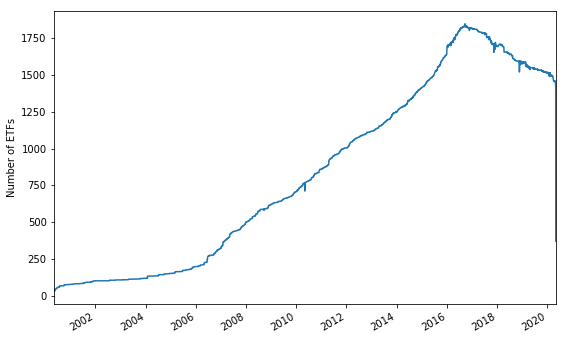

In [16]:
plt.figure(figsize=(9, 6))
df_adj.count(axis=1).plot()
plt.ylabel("Number of ETFs")
#plt.title("Developement of the number of ETFs in the asset universe")
plt.show()

We see that the number of ETFs grow steadily from the beginning of the period unit beginning 2016, then the number of ETFs start to drop again. Near the end of the period, late 2019 there is a big drop in the price data of the ETFs which is most likely due to missing price information for the newest dates.

Make the df_adj start from 13-09-2014

In [17]:
startdate = "13-09-2014" 

df_adj = df_adj[df_adj.index > startdate]

#df_adj = df_adj[df_adj.index < enddate]

df_adj.head()

,ALTS,ALTY,AMJ,AMJL,AMLP,AMU,AMUB,AMZA,AND,ANGL,...,YPRO,YXI,YYY,ZBIO,ZIV,ZLRG,ZMLP,ZROZ,ZSL,ZSML
2014-09-15,NaN,NaN,35.6661,NaN,12.1100,22.4158,NaN,NaN,10.4352,20.2790,...,NaN,29.8017,14.0010,NaN,46.38,NaN,182.0759,87.3935,45.230,NaN
2014-09-16,NaN,NaN,35.9928,NaN,12.2061,22.6468,NaN,NaN,10.5578,20.2651,...,NaN,29.2694,14.0659,NaN,47.20,NaN,182.9788,87.0994,45.135,NaN
2014-09-17,NaN,NaN,36.1698,NaN,12.2445,22.7351,NaN,NaN,10.5389,20.3226,...,NaN,29.6634,14.0719,NaN,47.36,NaN,183.2356,86.5899,46.140,NaN
2014-09-18,NaN,NaN,36.3741,NaN,12.2894,22.8709,NaN,NaN,10.4833,20.2883,...,NaN,29.7195,14.1191,NaN,47.35,NaN,183.5351,86.9697,46.110,NaN
2014-09-19,NaN,NaN,36.6464,NaN,12.3342,23.0136,NaN,NaN,10.4422,20.4100,...,NaN,30.2658,14.0955,NaN,47.48,NaN,184.7333,89.2274,49.065,NaN


In [18]:
df_adj.tail()

,ALTS,ALTY,AMJ,AMJL,AMLP,AMU,AMUB,AMZA,AND,ANGL,...,YPRO,YXI,YYY,ZBIO,ZIV,ZLRG,ZMLP,ZROZ,ZSL,ZSML
2020-04-29,34.4617,10.3300,13.91,NaN,5.21,8.7800,8.7191,18.60,NaN,26.9608,...,NaN,18.5039,13.650,NaN,32.23,NaN,54.98,182.23,29.2700,NaN
2020-04-30,34.1741,10.1545,13.65,NaN,5.13,8.5900,8.6000,18.15,NaN,27.0804,...,NaN,19.0400,13.580,NaN,31.76,NaN,54.38,178.52,30.9459,NaN
2020-05-01,33.7980,9.7700,13.01,NaN,4.87,8.1700,8.1800,16.70,NaN,26.6000,...,NaN,19.7400,13.410,NaN,29.62,NaN,51.96,180.50,31.1204,NaN
2020-05-04,NaN,9.7203,13.27,NaN,4.96,8.3263,8.3328,17.12,NaN,26.4900,...,NaN,19.5315,13.455,NaN,29.59,NaN,52.32,179.93,32.0775,NaN
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Now we have to calculate the returns dataframe**

In [19]:
df_ret = df_adj/df_adj.shift(1)-1

In [20]:
df_ret_daily = df_ret.copy()

In [21]:
df_ret = df_ret.resample("W-WED").agg(lambda x: (x+1).prod()-1)

In [22]:
df_ret.head()

,ALTS,ALTY,AMJ,AMJL,AMLP,AMU,AMUB,AMZA,AND,ANGL,...,YPRO,YXI,YYY,ZBIO,ZIV,ZLRG,ZMLP,ZROZ,ZSL,ZSML
2014-09-17,0.000000,0.0,0.014123,0.0,0.011107,0.014244,0.0,0.000000,0.009938,0.002150,...,0.0,-0.004641,0.005064,0.0,0.021130,0.0,0.006369,-0.009195,0.020119,0.0
2014-09-24,0.000000,0.0,-0.012610,0.0,-0.008894,-0.011951,0.0,0.000000,-0.026834,-0.003937,...,0.0,0.011984,-0.009238,0.0,-0.021748,0.0,-0.009418,0.032956,0.086151,0.0
2014-10-01,0.000000,0.0,-0.004001,0.0,0.002109,-0.002724,0.0,0.000000,-0.021499,-0.005217,...,0.0,0.066448,-0.023397,0.0,-0.077703,0.0,-0.000720,0.049769,0.058665,0.0
2014-10-08,0.000000,0.0,-0.022010,0.0,-0.012639,-0.023649,0.0,-0.023080,-0.003129,0.007916,...,0.0,-0.046268,0.006118,0.0,0.053124,0.0,-0.024742,0.008642,-0.025634,0.0
2014-10-15,-0.015096,0.0,-0.068300,0.0,-0.048561,-0.069631,0.0,-0.073727,-0.043262,-0.021043,...,0.0,0.034930,-0.063399,0.0,-0.138222,0.0,-0.070882,0.043666,-0.013831,0.0


In [23]:
df_ret.shape

(295, 1878)

Since the first row is empty we want to exclude that from the dataframe.

In [24]:
startdate = "17-09-2014" 

df_ret = df_ret[df_ret.index > startdate]

df_ret.shape

(294, 1878)

**Select only the 539 ETFs previously selected and delete the rest from the dataframe.**

Read in the old dataframe

In [25]:
df_old=pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRet.csv", index_col=0)

In [26]:
df_old.columns

Index(['ANGL', 'AOA', 'AOK', 'AOM', 'AOR', 'ASHR', 'BAB', 'BBH', 'BIL', 'BIV',
       ...
       'XLY', 'XME', 'XMLV', 'XOP', 'XPH', 'XRT', 'XSD', 'XSLV', 'XTN',
       'ZROZ'],
      dtype='object', length=539)

Save only those 539 ETFs to the df_ret dataframe

In [27]:
df_ret = df_ret.loc[:,df_ret.columns.isin(list(df_old.columns))]

In [28]:
df_ret

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,-0.003937,-0.011539,-9.181767e-04,-0.002555,-0.006729,0.019380,0.006835,0.031122,0.000218,0.002746,...,-0.006637,-0.079692,-0.018236,-0.046635,0.001107,-0.020785,-0.011324,-0.019101,-0.023284,0.032956
2014-10-01,-0.005217,-0.024860,-7.662026e-03,-0.011659,-0.017566,-0.008926,0.010849,-0.040121,0.000000,0.009505,...,-0.028208,-0.068060,-0.016994,-0.057397,-0.032208,-0.032691,-0.048258,-0.018115,-0.039086,0.049769
2014-10-08,0.007916,0.007719,4.900256e-03,0.005247,0.009118,0.027804,0.007041,0.012271,-0.000218,0.007919,...,0.012614,-0.021823,0.012677,-0.043836,0.016973,0.012926,-0.013129,0.022811,-0.005857,0.008642
2014-10-15,-0.021043,-0.036417,-1.416299e-02,-0.018677,-0.026937,-0.017145,0.011749,-0.070555,-0.000219,0.009147,...,-0.051929,-0.054633,-0.017676,-0.113597,-0.052413,-0.027395,-0.103751,0.003282,-0.037326,0.043666
2014-10-22,0.022970,0.024280,9.369896e-03,0.013471,0.018541,-0.012787,-0.009251,0.086916,0.000219,-0.004997,...,0.037201,0.026625,0.042732,0.021712,0.034137,0.018176,0.049587,0.019613,0.064414,-0.026481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-08,0.037705,0.072408,3.027786e-02,0.037838,0.052483,0.051494,0.028094,0.084465,-0.000218,0.004941,...,0.118356,0.100569,0.111407,0.330541,0.083333,0.155191,0.146803,0.085556,0.106977,-0.009014
2020-04-15,0.056047,0.006101,1.075350e-02,0.008056,0.007787,-0.009720,0.028951,0.024678,0.000000,0.019891,...,0.034354,0.014943,-0.014354,-0.024213,0.025641,0.021309,0.009348,-0.018580,-0.011942,0.026265
2020-04-22,-0.022694,0.006873,-2.220446e-16,0.004795,0.006088,0.020385,0.007442,0.067187,0.000000,-0.002083,...,0.018636,0.010759,-0.021845,0.112159,0.018490,0.006955,0.014600,-0.020458,-0.020815,0.016231
2020-04-29,0.013857,0.044569,1.753795e-02,0.022269,0.032814,0.015168,0.002203,0.009295,-0.000109,0.003404,...,0.062675,0.133333,0.085112,0.198795,0.089747,0.138739,0.110395,0.148067,0.136686,-0.006650


Save only those 539 ETFs to the df_adj dataframe

In [29]:
df_adj = df_adj.loc[:,df_adj.columns.isin(list(df_old.columns))]

In [30]:
df_adj

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-15,20.2790,39.7058,28.4085,30.4413,34.1078,18.9411,23.2987,100.8992,87.2556,71.1295,...,62.6366,36.8355,27.1889,272.7153,45.2800,40.6534,35.8179,26.8831,45.0822,87.3935
2014-09-16,20.2651,39.9283,28.4521,30.5363,34.2769,18.8080,23.2352,103.0468,87.2556,71.0871,...,62.9586,37.2036,27.2333,277.4288,45.8018,41.0219,36.2982,26.7872,45.2831,87.0994
2014-09-17,20.3226,40.0395,28.4259,30.4499,34.2684,18.7044,23.2350,103.3508,87.2556,70.9769,...,62.9310,37.5808,27.2421,276.6865,46.7807,41.0817,36.5864,26.8779,45.7694,86.5899
2014-09-18,20.2883,40.0224,28.4956,30.5622,34.3282,18.7784,23.2432,104.5766,87.2746,70.9600,...,63.2071,36.9881,27.2226,272.3071,46.8239,41.1600,37.2301,26.9869,46.1608,86.9697
2014-09-19,20.4100,39.9111,28.4869,30.5363,34.2769,18.7710,23.3462,104.9002,87.2746,71.1125,...,63.2334,36.4978,27.1820,268.9541,46.5732,40.8554,36.5760,26.7987,45.7887,89.2274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29,26.9608,52.0300,35.3395,38.5600,44.3800,27.4400,31.8400,148.9316,91.5257,91.2117,...,117.3300,20.2300,43.7300,53.7300,42.6200,37.9200,103.4000,36.8300,49.7300,182.2300
2020-04-30,27.0804,51.4100,35.1897,38.2300,43.8900,26.9200,31.6000,148.3100,91.5457,91.1019,...,116.6000,19.3300,42.3400,54.3600,41.9700,36.6800,99.5300,35.1400,48.0400,178.5200
2020-05-01,26.6000,50.2600,34.8502,37.7900,43.1600,25.9900,31.7500,145.5700,91.5300,90.9700,...,112.2400,18.9000,40.8400,50.0100,40.7100,35.6600,94.4000,33.7700,46.4300,180.5000
2020-05-04,26.4900,50.4000,34.9000,37.9200,43.2500,26.1400,31.8100,147.8666,91.5300,91.0900,...,112.8500,19.2600,40.7700,52.5900,40.9900,35.8500,95.1800,33.3200,45.6600,179.9300


Find where df_adj have nan values

In [31]:
values = df_adj.loc[:,df_adj.columns.isin(list(df_old.columns))].isnull().sum() > 1

In [32]:
np.nonzero(values)

/Users/a/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


(array([ 16,  20,  67, 346, 348]),)

So those are the ETFs that have more than one nan value, lets look into them

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_adj.iloc[:,20])

2014-09-15    20.6319
2014-09-16    20.6319
2014-09-17    20.6319
2014-09-18    20.6319
2014-09-19    20.6557
2014-09-22    20.6557
2014-09-23    20.6081
2014-09-24    20.5763
2014-09-25    20.4492
2014-09-26    20.4810
2014-09-29    20.3460
2014-09-30    20.4095
2014-10-01    20.4075
2014-10-02    20.4473
2014-10-03    20.5270
2014-10-06    20.5350
2014-10-07    20.5031
2014-10-08    20.5749
2014-10-09    20.4154
2014-10-10    20.3676
2014-10-13    20.3038
2014-10-14    20.2719
2014-10-15    20.2480
2014-10-16    20.2321
2014-10-17    20.3835
2014-10-20    20.4393
2014-10-21    20.5430
2014-10-22    20.5350
2014-10-23    20.6386
2014-10-24    20.6386
2014-10-27    20.5907
2014-10-28    20.6466
2014-10-29    20.6068
2014-10-30    20.6466
2014-10-31    20.6466
2014-11-03    20.6263
2014-11-04    20.6343
2014-11-05    20.6183
2014-11-06    20.6423
2014-11-07    20.6103
2014-11-10    20.6103
2014-11-11    20.5783
2014-11-12    20.6183
2014-11-13    20.7223
2014-11-14    20.5463
2014-11-17

Only BSJC (16) and BSJJ (20) have many missing values, the other three ETFs have two missing values. Lets cut the last values from the df_ret dataframe and delete those two ETFs.

In [34]:
enddate = "05-05-2020" 

df_ret = df_ret[df_ret.index < enddate]

df_ret.shape

(293, 539)

In [35]:
df_ret = df_ret.drop(columns=["BSCJ", "BSJJ"])

In [36]:
df_ret.iloc[:,16]

2014-09-24    0.002238
2014-10-01    0.004061
2014-10-08    0.004260
2014-10-15    0.007777
2014-10-22   -0.003508
                ...   
2020-04-01    0.005740
2020-04-08    0.008085
2020-04-15    0.004716
2020-04-22    0.000466
2020-04-29   -0.000940
Freq: W-WED, Name: BSCK, Length: 293, dtype: float64

**Change the weekly returns from USD to EUR.**

Downloaded the dataset from here: https://www.investing.com/currencies/eur-usd


In [37]:
df_USDEUR=pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/186IndexesData+Cleaning/NewDataIndexes/USD_EUR Historical Data_NEWNEW.csv", index_col=0)



In [38]:
df_USDEUR.head()

,Price,Open,High,Low,Change %
Date,,,,,
"May 06, 2020",0.9262,0.9226,0.9266,0.9222,0.36%
"May 05, 2020",0.9228,0.9168,0.9237,0.9152,0.66%
"May 04, 2020",0.9168,0.9107,0.9179,0.9107,0.67%
"May 01, 2020",0.9107,0.9128,0.9146,0.9075,-0.22%
"Apr 30, 2020",0.9126,0.9198,0.9232,0.9114,-0.75%


Change the index to datetime

In [39]:
df_USDEUR.index.dtype

dtype('O')

In [40]:
df_USDEUR.index = pd.to_datetime(df_USDEUR.index)

In [41]:
df_USDEUR = df_USDEUR.sort_index()

In [42]:
df_USDEUR

,Price,Open,High,Low,Change %
Date,,,,,
2013-04-08,0.7682,0.7695,0.7712,0.7669,-0.21%
2013-04-09,0.7644,0.7680,0.7690,0.7630,-0.49%
2013-04-10,0.7651,0.7644,0.7661,0.7620,0.09%
2013-04-11,0.7631,0.7652,0.7667,0.7610,-0.26%
2013-04-12,0.7629,0.7629,0.7671,0.7617,-0.03%
...,...,...,...,...,...
2020-04-30,0.9126,0.9198,0.9232,0.9114,-0.75%
2020-05-01,0.9107,0.9128,0.9146,0.9075,-0.22%
2020-05-04,0.9168,0.9107,0.9179,0.9107,0.67%


The Change % column is an object, we need to change that to int and add two zeros in front of each number.

In [43]:
df_USDEUR["Change %"]=df_USDEUR["Change %"].str.split('%').str[0].tolist()

In [44]:
df_USDEUR["Change %"]=df_USDEUR["Change %"].astype("float64")

In [45]:
df_USDEUR["Change %"] = df_USDEUR["Change %"]*0.01

In [46]:
df_USDEUR.tail(10)

,Price,Open,High,Low,Change %
Date,,,,,
2020-04-23,0.9278,0.9239,0.9298,0.9219,0.0042
2020-04-24,0.9240,0.9278,0.9323,0.9233,-0.0040
2020-04-27,0.9233,0.9252,0.9252,0.9206,-0.0008
2020-04-28,0.9242,0.9234,0.9251,0.9183,0.0009
2020-04-29,0.9196,0.9243,0.9244,0.9186,-0.0050
2020-04-30,0.9126,0.9198,0.9232,0.9114,-0.0075
2020-05-01,0.9107,0.9128,0.9146,0.9075,-0.0022
2020-05-04,0.9168,0.9107,0.9179,0.9107,0.0067
2020-05-05,0.9228,0.9168,0.9237,0.9152,0.0066


Calculate the cumulative weekly return on USDEUR

In [47]:
df_USDEUR_weekly = df_USDEUR["Change %"].resample("W-WED").agg(lambda x: (x+1).prod()-1)

In [48]:
df_USDEUR_weekly

Date
2013-04-10   -0.006096
2013-04-17    0.002778
2013-04-24    0.001185
2013-05-01   -0.012254
2013-05-08    0.001937
                ...   
2020-04-08    0.009844
2020-04-15   -0.004752
2020-04-22    0.007998
2020-04-29   -0.004719
2020-05-06    0.007144
Freq: W-WED, Name: Change %, Length: 370, dtype: float64

Join the dataframes together

In [49]:
df_ret=df_ret.join(df_USDEUR_weekly)

In [50]:
df_ret

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,Change %
2014-09-24,-0.003937,-0.011539,-9.181767e-04,-0.002555,-0.006729,0.019380,0.006835,0.031122,0.000218,0.002746,...,-0.079692,-0.018236,-0.046635,0.001107,-0.020785,-0.011324,-0.019101,-0.023284,0.032956,0.006775
2014-10-01,-0.005217,-0.024860,-7.662026e-03,-0.011659,-0.017566,-0.008926,0.010849,-0.040121,0.000000,0.009505,...,-0.068060,-0.016994,-0.057397,-0.032208,-0.032691,-0.048258,-0.018115,-0.039086,0.049769,0.012553
2014-10-08,0.007916,0.007719,4.900256e-03,0.005247,0.009118,0.027804,0.007041,0.012271,-0.000218,0.007919,...,-0.021823,0.012677,-0.043836,0.016973,0.012926,-0.013129,0.022811,-0.005857,0.008642,-0.008814
2014-10-15,-0.021043,-0.036417,-1.416299e-02,-0.018677,-0.026937,-0.017145,0.011749,-0.070555,-0.000219,0.009147,...,-0.054633,-0.017676,-0.113597,-0.052413,-0.027395,-0.103751,0.003282,-0.037326,0.043666,-0.008057
2014-10-22,0.022970,0.024280,9.369896e-03,0.013471,0.018541,-0.012787,-0.009251,0.086916,0.000219,-0.004997,...,0.026625,0.042732,0.021712,0.034137,0.018176,0.049587,0.019613,0.064414,-0.026481,0.014761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.047163,-0.002385,1.147923e-02,0.007822,0.003471,-0.029008,0.010820,0.033729,-0.000193,0.016557,...,-0.026478,0.013473,-0.094516,0.022183,-0.073695,-0.038559,0.002282,-0.080990,0.036858,-0.007469
2020-04-08,0.037705,0.072408,3.027786e-02,0.037838,0.052483,0.051494,0.028094,0.084465,-0.000218,0.004941,...,0.100569,0.111407,0.330541,0.083333,0.155191,0.146803,0.085556,0.106977,-0.009014,0.009844
2020-04-15,0.056047,0.006101,1.075350e-02,0.008056,0.007787,-0.009720,0.028951,0.024678,0.000000,0.019891,...,0.014943,-0.014354,-0.024213,0.025641,0.021309,0.009348,-0.018580,-0.011942,0.026265,-0.004752
2020-04-22,-0.022694,0.006873,-2.220446e-16,0.004795,0.006088,0.020385,0.007442,0.067187,0.000000,-0.002083,...,0.010759,-0.021845,0.112159,0.018490,0.006955,0.014600,-0.020458,-0.020815,0.016231,0.007998


And finally we want to calculate the EUR returns for the indexes.

In [51]:
for i in range(0, df_ret.shape[1]-1):
    df_ret.iloc[:,i]=(df_ret.iloc[:,i]+1)*(df_ret["Change %"]+1)-1

In [52]:
df_ret.shape

(293, 538)

In [53]:
df_ret

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,Change %
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,-0.073457,-0.011585,-0.040176,0.007890,-0.014151,-0.004626,-0.012456,-0.016667,0.039955,0.006775
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.056361,-0.004654,-0.045565,-0.020060,-0.020549,-0.036311,-0.005790,-0.027024,0.062946,0.012553
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,-0.030445,0.003751,-0.052264,0.008009,0.003998,-0.021828,0.013795,-0.014620,-0.000249,-0.008814
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.062250,-0.025591,-0.120739,-0.060048,-0.035232,-0.110973,-0.004802,-0.045082,0.035257,-0.008057
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.041779,0.058124,0.036793,0.049401,0.033205,0.065079,0.034663,0.080125,-0.012111,0.014761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.039342,-0.009836,0.003925,0.000295,-4.023450e-03,-0.036260,0.003270,0.026008,-0.007661,0.008965,...,-0.033749,0.005904,-0.101279,0.014548,-0.080613,-0.045740,-0.005204,-0.087854,0.029114,-0.007469
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,0.111403,0.122347,0.343638,0.093997,0.166562,0.158091,0.096242,0.117873,0.000741,0.009844
2020-04-15,0.051029,0.001320,0.005950,0.003265,2.997190e-03,-0.014426,0.024061,0.019808,-0.004752,0.015044,...,0.010119,-0.019038,-0.028850,0.020767,0.016456,0.004551,-0.023244,-0.016637,0.021388,-0.004752
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,0.018842,-0.014022,0.121053,0.026635,0.015008,0.022715,-0.012624,-0.012983,0.024358,0.007998


**Drop the change % column from the dataframe.**

In [54]:
df_ret=df_ret.drop(columns=["Change %"])

### 2.8 Write the Dataframes to Excel Files

In this section we write the four dataframes to excel files.

In [55]:
df_ret

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,0.000092,-0.073457,-0.011585,-0.040176,0.007890,-0.014151,-0.004626,-0.012456,-0.016667,0.039955
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.016010,-0.056361,-0.004654,-0.045565,-0.020060,-0.020549,-0.036311,-0.005790,-0.027024,0.062946
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,0.003689,-0.030445,0.003751,-0.052264,0.008009,0.003998,-0.021828,0.013795,-0.014620,-0.000249
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.059568,-0.062250,-0.025591,-0.120739,-0.060048,-0.035232,-0.110973,-0.004802,-0.045082,0.035257
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.052510,0.041779,0.058124,0.036793,0.049401,0.033205,0.065079,0.034663,0.080125,-0.012111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.039342,-0.009836,0.003925,0.000295,-4.023450e-03,-0.036260,0.003270,0.026008,-0.007661,0.008965,...,-0.045369,-0.033749,0.005904,-0.101279,0.014548,-0.080613,-0.045740,-0.005204,-0.087854,0.029114
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,0.129365,0.111403,0.122347,0.343638,0.093997,0.166562,0.158091,0.096242,0.117873,0.000741
2020-04-15,0.051029,0.001320,0.005950,0.003265,2.997190e-03,-0.014426,0.024061,0.019808,-0.004752,0.015044,...,0.029439,0.010119,-0.019038,-0.028850,0.020767,0.016456,0.004551,-0.023244,-0.016637,0.021388
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,0.026783,0.018842,-0.014022,0.121053,0.026635,0.015008,0.022715,-0.012624,-0.012983,0.024358


In [56]:
enddate = "12-30-2019" 

df_ret = df_ret[df_ret.index < enddate]

df_ret.shape

(275, 537)

In [57]:
Columns = df_ret.columns #the columns in the new dataframe are the indexes
ret = pd.DataFrame(columns=Columns) #create an empty dataframe
ret = ret.transpose()

In [58]:
ret

""
ANGL
AOA
AOK
AOM
AOR
...
XRT
XSD
XSLV
XTN


In [59]:
valueslist=[]

for i in range(0, df_ret.shape[1]):
    counter = 0
    value=1
    for j in range(1,df_ret.shape[0]):
        value=value*(df_ret.iloc[j,i]+1)
        counter=counter+1
        
    valueslist.append((1+value**(1/counter)-1)**52-1)
    
ret["AvgReturnYearly"]=valueslist

Calculate the yearly standard deviation for each index.

In [60]:
import math
ret["YearlyStd"] = df_ret.std()*math.sqrt(52)

In [61]:
ret.head()

,AvgReturnYearly,YearlyStd
ANGL,0.101495,0.103994
AOA,0.103260,0.123007
AOK,0.074134,0.086737
AOM,0.081687,0.092003
AOR,0.094289,0.105892


### 1.2 Dataframe for Volume Traided

Now we want to create a dataframe for the volume traided on weekly basis.

Import the daily data.

In [62]:
df_vol = pd.read_csv("ETFdataNewer.csv",index_col=0)

In [63]:
df_vol.tail()

,ALTS.Volume,ALTS.Adjusted,ALTY.Volume,ALTY.Adjusted,AMJ.Volume,AMJ.Adjusted,AMJL.Volume,AMJL.Adjusted,AMLP.Volume,AMLP.Adjusted,...,ZROZ.Volume,ZROZ.Adjusted,ZSL.Volume,ZSL.Adjusted,ZSML.Volume,ZSML.Adjusted,ALTS.Volume.1,ALTS.Adjusted.1,ALTY.Volume.1,ALTY.Adjusted.1
29/04/2020,18.0,34.4617,10754.0,10.3300,3948558.0,13.91,NaN,NaN,30774052.0,5.21,...,100061.0,182.23,22212.0,29.2700,NaN,NaN,18.0,34.4617,10754.0,10.3300
30/04/2020,967.0,34.1741,14769.0,10.1545,7302638.0,13.65,NaN,NaN,35569939.0,5.13,...,58142.0,178.52,33565.0,30.9459,NaN,NaN,967.0,34.1741,14769.0,10.1545
01/05/2020,500.0,33.7980,6857.0,9.7700,2427871.0,13.01,NaN,NaN,26662016.0,4.87,...,37098.0,180.50,24976.0,31.1204,NaN,NaN,500.0,33.7980,6857.0,9.7700
04/05/2020,NaN,NaN,11150.0,9.7203,2175035.0,13.27,NaN,NaN,28848829.0,4.96,...,40692.0,179.93,24485.0,32.0775,NaN,NaN,NaN,NaN,11150.0,9.7203
05/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The dates are objects, change them to datetime.**

In [64]:
df_vol.index.dtype

dtype('O')

In [65]:
df_vol.index = pd.to_datetime(df_vol.index, dayfirst=True)

In [66]:
df_vol.index.dtype

dtype('<M8[ns]')

**Disregard the adjusted price from the dataframe.**

Save the name of the volume columns.

In [67]:
df_columns_vol=df_vol.columns[df_vol.columns.str.endswith('Volume')]


Overwrite the old df_vol dataframe with only the volume traided.

In [68]:
df_vol = df_vol[df_columns_vol]


Save the names of the ETFs and set as the columns names.

In [69]:
ETF_names = []

for i in range(len(df_columns_vol)):
    ETF_names.append(df_columns_vol[i].split(".")[0])

In [70]:
df_vol.columns = ETF_names

In [71]:
df_vol.head()

,ALTS,ALTY,AMJ,AMJL,AMLP,AMU,AMUB,AMZA,AND,ANGL,...,YPRO,YXI,YYY,ZBIO,ZIV,ZLRG,ZMLP,ZROZ,ZSL,ZSML
2000-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we have the df_vol dataframe with daily data on the volume traided.

**Change the daily volume data to weekly data.**

We have to sum over the volume traided over the last week, from Thursday-Wednesday.

In [72]:
df_vol= df_vol.resample("W-WED",).sum()

In [73]:
df_vol.tail(5)

,ALTS,ALTY,AMJ,AMJL,AMLP,AMU,AMUB,AMZA,AND,ANGL,...,YPRO,YXI,YYY,ZBIO,ZIV,ZLRG,ZMLP,ZROZ,ZSL,ZSML
2020-04-08,1451.0,62450.0,22309473.0,0.0,261603147.0,489470.0,251880.0,721286.0,0.0,6423491.0,...,0.0,95015.0,331257.0,0.0,909087.0,0.0,321493.0,383946.0,285619.0,0.0
2020-04-15,7597.0,55239.0,20936953.0,0.0,176866770.0,375952.0,10091.0,430582.0,0.0,13177655.0,...,0.0,24733.0,385747.0,0.0,487113.0,0.0,314838.0,250960.0,120777.0,0.0
2020-04-22,4128.0,31367.0,18239379.0,0.0,172007077.0,145555.0,70426.0,541498.0,0.0,5273271.0,...,0.0,53887.0,339204.0,0.0,519668.0,0.0,542187.0,233338.0,327003.0,0.0
2020-04-29,682.0,25993.0,13021977.0,0.0,158114154.0,224715.0,149151.0,719506.0,0.0,5404278.0,...,0.0,33259.0,471526.0,0.0,389883.0,0.0,78365.0,385360.0,270174.0,0.0
2020-05-06,1467.0,32776.0,11905544.0,0.0,91080784.0,66523.0,63356.0,405210.0,0.0,3786195.0,...,0.0,44836.0,263216.0,0.0,399582.0,0.0,24366.0,135932.0,83026.0,0.0


In [74]:
df_vol.shape

(1045, 1878)

Now we want to pick out only the ETFs that are in df_ret.

In [75]:
df_vol = df_vol.loc[:,df_ret.columns]

Now we want to save only the dates

In [76]:
startdate = "23-09-2014"
enddate = "05-01-2020" 

df_vol = df_vol[df_vol.index > startdate]
df_vol = df_vol[df_vol.index < enddate]

df_vol.shape

(293, 537)

In [77]:
df_vol

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,9994.0,123006.0,93058.0,218846.0,185853.0,2312073.0,511116.0,449268.0,2858298.0,1009275.0,...,25996327.0,12105212.0,23282.0,44357662.0,297769.0,7651454.0,415886.0,22536.0,148425.0,60358.0
2014-10-01,16815.0,170358.0,149673.0,519233.0,183975.0,3210330.0,933751.0,383418.0,2437257.0,2765664.0,...,25066966.0,13441788.0,73608.0,52146024.0,339952.0,7724893.0,486658.0,48464.0,175940.0,61600.0
2014-10-08,5480.0,187565.0,122397.0,182683.0,169889.0,2329747.0,502747.0,430154.0,2877590.0,1457487.0,...,29952921.0,16668058.0,35763.0,69315848.0,346776.0,10229668.0,825904.0,67052.0,417275.0,125691.0
2014-10-15,29367.0,214729.0,230703.0,298832.0,267112.0,3524140.0,961994.0,636649.0,6150651.0,1909968.0,...,81364656.0,23765164.0,66363.0,118769714.0,401768.0,16468980.0,892352.0,241619.0,345981.0,1134838.0
2014-10-22,30274.0,162388.0,227637.0,187174.0,240260.0,3528766.0,595097.0,854796.0,18357536.0,1472265.0,...,40685600.0,18776285.0,101059.0,100466800.0,355324.0,14278956.0,924054.0,93325.0,395700.0,979145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,5616061.0,1031511.0,1100826.0,2425384.0,1536281.0,24955274.0,3342552.0,141085.0,26231451.0,7876757.0,...,30196573.0,9665032.0,4565604.0,132534243.0,568933.0,34925220.0,546113.0,4000288.0,188060.0,331504.0
2020-04-08,6423491.0,648389.0,865668.0,1635605.0,933030.0,34660459.0,2489940.0,120805.0,20852319.0,5231384.0,...,27656149.0,10581915.0,2657069.0,96844519.0,555627.0,43805490.0,395245.0,3717165.0,410220.0,383946.0
2020-04-15,13177655.0,596824.0,596003.0,1384208.0,1154658.0,13642511.0,1307750.0,101560.0,25447348.0,3608433.0,...,18288081.0,11737914.0,2685542.0,68548554.0,629193.0,28502723.0,406321.0,2819486.0,177198.0,250960.0
2020-04-22,5273271.0,685377.0,1344009.0,1406541.0,1040016.0,18618832.0,1769473.0,250676.0,20630033.0,6366483.0,...,20112716.0,11700132.0,3200600.0,69339423.0,408576.0,27897003.0,369352.0,3124194.0,133969.0,233338.0


**Now we want to change the USD vol to EUR vol.**

In [78]:
df_USDEUR=pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/186IndexesData+Cleaning/NewDataIndexes/USD_EUR Historical Data_NEWNEW.csv", index_col=0)



In [79]:
df_USDEUR.head()

,Price,Open,High,Low,Change %
Date,,,,,
"May 06, 2020",0.9262,0.9226,0.9266,0.9222,0.36%
"May 05, 2020",0.9228,0.9168,0.9237,0.9152,0.66%
"May 04, 2020",0.9168,0.9107,0.9179,0.9107,0.67%
"May 01, 2020",0.9107,0.9128,0.9146,0.9075,-0.22%
"Apr 30, 2020",0.9126,0.9198,0.9232,0.9114,-0.75%


Change the index to datetime

In [80]:
df_USDEUR.index.dtype

dtype('O')

In [81]:
df_USDEUR.index = pd.to_datetime(df_USDEUR.index)

In [82]:
df_USDEUR = df_USDEUR.sort_index()

In [83]:
df_USDEUR

,Price,Open,High,Low,Change %
Date,,,,,
2013-04-08,0.7682,0.7695,0.7712,0.7669,-0.21%
2013-04-09,0.7644,0.7680,0.7690,0.7630,-0.49%
2013-04-10,0.7651,0.7644,0.7661,0.7620,0.09%
2013-04-11,0.7631,0.7652,0.7667,0.7610,-0.26%
2013-04-12,0.7629,0.7629,0.7671,0.7617,-0.03%
...,...,...,...,...,...
2020-04-30,0.9126,0.9198,0.9232,0.9114,-0.75%
2020-05-01,0.9107,0.9128,0.9146,0.9075,-0.22%
2020-05-04,0.9168,0.9107,0.9179,0.9107,0.67%


Now we need to use the price column.

In [84]:
df_vol=df_vol.join(df_USDEUR["Price"])

In [85]:
for i in range(0, df_vol.shape[1]-1):
    df_vol.iloc[:,i]=df_vol.iloc[:,i]*df_vol["Price"]

In [86]:
df_vol

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,Price
2014-09-24,7.819306e+03,96239.8944,7.280858e+04,1.712251e+05,1.454114e+05,1.808966e+06,3.998972e+05,351507.2832,2.236332e+06,7.896568e+05,...,9.471118e+06,1.821584e+04,3.470543e+07,232974.4656,5.986498e+06,325389.2064,1.763217e+04,116127.7200,47224.0992,0.7824
2014-10-01,1.332084e+04,134957.6076,1.185710e+05,4.113364e+05,1.457450e+05,2.543223e+06,7.397175e+05,303743.7396,1.930795e+06,2.190959e+06,...,1.064858e+07,5.831226e+04,4.131008e+07,269309.9744,6.119660e+06,385530.4676,3.839318e+04,139379.6680,48799.5200,0.7922
2014-10-08,4.303444e+03,147294.7945,9.611836e+04,1.434610e+05,1.334138e+05,1.829550e+06,3.948072e+05,337799.9362,2.259771e+06,1.144565e+06,...,1.308943e+07,2.808468e+04,5.443374e+07,272323.1928,8.033358e+06,648582.4112,5.265594e+04,327686.0575,98705.1423,0.7853
2014-10-15,2.287689e+04,167273.8910,1.797176e+05,2.327901e+05,2.080802e+05,2.745305e+06,7.493933e+05,495949.5710,4.791357e+06,1.487865e+06,...,1.851306e+07,5.169678e+04,9.252161e+07,312977.2720,1.282934e+07,695142.2080,1.882212e+05,269519.1990,884038.8020,0.7790
2014-10-22,2.393160e+04,128367.7140,1.799470e+05,1.479610e+05,1.899255e+05,2.789490e+06,4.704242e+05,675716.2380,1.451163e+07,1.163825e+06,...,1.484265e+07,7.988714e+04,7.941901e+07,280883.6220,1.128751e+07,730464.6870,7.377341e+04,312800.8500,774014.1225,0.7905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,5.122409e+06,940841.1831,1.004063e+06,2.212193e+06,1.401242e+06,2.276171e+07,3.048742e+06,128683.6285,2.392571e+07,7.184390e+06,...,8.815476e+06,4.164287e+06,1.208845e+08,518923.7893,3.185529e+07,498109.6673,3.648663e+06,171529.5260,302364.7984,0.9121
2020-04-08,5.915393e+06,597101.4301,7.971937e+05,1.506229e+06,8.592273e+05,3.191882e+07,2.292986e+06,111249.3245,1.920290e+07,4.817582e+06,...,9.744886e+06,2.446895e+06,8.918412e+07,511676.9043,4.034048e+07,363981.1205,3.423137e+06,377771.5980,353575.8714,0.9209
2020-04-15,1.207864e+07,547048.8784,5.462963e+05,1.268765e+06,1.058360e+06,1.250473e+07,1.198684e+06,93089.8960,2.332504e+07,3.307490e+06,...,1.075897e+07,2.461568e+06,6.283160e+07,576718.3038,2.612560e+07,372433.8286,2.584341e+06,162419.6868,230029.9360,0.9166
2020-04-22,4.872502e+06,633288.3480,1.241864e+06,1.299644e+06,9.609748e+05,1.720380e+07,1.634993e+06,231624.6240,1.906215e+07,5.882630e+06,...,1.081092e+07,2.957354e+06,6.406963e+07,377524.2240,2.577683e+07,341281.2480,2.886755e+06,123787.3560,215604.3120,0.9240


In [87]:
df_vol=df_vol.drop(columns=["Price"])

### 1.2 Dataframe for Adjusted price


Now we want to pick out only the ETFs that are in df_ret.

In [88]:
df_adj = df_adj.loc[:,df_ret.columns]

Now we want to save only the dates

In [89]:
startdate = "23-09-2014"
enddate = "05-01-2020" 

df_adj = df_adj[df_adj.index > startdate]
df_adj = df_adj[df_adj.index < enddate]

df_adj.shape

(1410, 537)

In [90]:
df_adj

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,20.2426,39.5775,28.3998,30.3721,34.0378,19.0669,23.3938,106.5673,87.2746,71.1718,...,62.5133,34.5859,26.7453,263.7833,46.8325,40.2278,36.1721,26.3645,44.7037,89.4436
2014-09-25,20.2426,39.1049,28.2780,30.1821,33.7559,18.8450,23.5286,104.2432,87.2746,71.4091,...,61.5992,33.8013,26.5047,258.0173,46.0416,39.7248,35.5037,26.1388,44.1767,91.0093
2014-09-26,20.1333,39.2952,28.3215,30.2771,33.8840,18.9485,23.4573,104.9983,87.2746,71.2820,...,62.2363,33.6840,26.6562,261.5141,46.3398,39.8633,35.8739,26.2864,44.6563,91.1824
2014-09-29,20.0004,39.1240,28.2519,30.1735,33.7473,18.7562,23.5683,104.8610,87.2556,71.3582,...,61.9132,33.3593,26.6401,264.4901,46.3311,39.8863,35.8355,26.2168,44.5708,92.2290
2014-09-30,20.2061,38.9872,28.2519,30.1648,33.7132,19.0669,23.5128,103.7921,87.2746,71.4006,...,61.5715,33.1790,26.5849,256.0458,45.8168,39.4895,35.3017,26.1214,44.2289,91.2516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,26.5425,50.2200,34.8702,37.8800,43.2500,26.8200,31.8050,149.7800,91.5357,91.0021,...,112.2500,17.9900,40.6100,47.0000,40.5700,34.5400,95.1700,32.4500,45.2505,185.4600
2020-04-27,26.5027,50.8600,35.0000,38.0700,43.6300,27.0700,31.7600,151.1700,91.5357,90.6927,...,114.3500,18.5600,42.0200,48.0300,41.8600,36.3600,97.3300,33.8200,46.8500,180.7400
2020-04-28,26.5625,50.8600,35.0100,38.1600,43.7000,27.1200,31.9480,148.1800,91.5357,90.9622,...,114.8000,18.9400,42.6400,48.4800,41.4300,36.8200,97.4300,34.9800,47.8200,184.0700
2020-04-29,26.9608,52.0300,35.3395,38.5600,44.3800,27.4400,31.8400,148.9316,91.5257,91.2117,...,117.3300,20.2300,43.7300,53.7300,42.6200,37.9200,103.4000,36.8300,49.7300,182.2300


**Now we want to change the USD price to EUR price.**

In [91]:
df_USDEUR=pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/186IndexesData+Cleaning/NewDataIndexes/USD_EUR Historical Data_NEWNEW.csv", index_col=0)



In [92]:
df_USDEUR.head()

,Price,Open,High,Low,Change %
Date,,,,,
"May 06, 2020",0.9262,0.9226,0.9266,0.9222,0.36%
"May 05, 2020",0.9228,0.9168,0.9237,0.9152,0.66%
"May 04, 2020",0.9168,0.9107,0.9179,0.9107,0.67%
"May 01, 2020",0.9107,0.9128,0.9146,0.9075,-0.22%
"Apr 30, 2020",0.9126,0.9198,0.9232,0.9114,-0.75%


Change the index to datetime

In [93]:
df_USDEUR.index.dtype

dtype('O')

In [94]:
df_USDEUR.index = pd.to_datetime(df_USDEUR.index)

In [95]:
df_USDEUR = df_USDEUR.sort_index()

In [96]:
df_USDEUR

,Price,Open,High,Low,Change %
Date,,,,,
2013-04-08,0.7682,0.7695,0.7712,0.7669,-0.21%
2013-04-09,0.7644,0.7680,0.7690,0.7630,-0.49%
2013-04-10,0.7651,0.7644,0.7661,0.7620,0.09%
2013-04-11,0.7631,0.7652,0.7667,0.7610,-0.26%
2013-04-12,0.7629,0.7629,0.7671,0.7617,-0.03%
...,...,...,...,...,...
2020-04-30,0.9126,0.9198,0.9232,0.9114,-0.75%
2020-05-01,0.9107,0.9128,0.9146,0.9075,-0.22%
2020-05-04,0.9168,0.9107,0.9179,0.9107,0.67%


Now we need to use the price column.

In [97]:
df_adj=df_adj.join(df_USDEUR["Price"])

In [98]:
df_adj

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,Price
2014-09-24,20.2426,39.5775,28.3998,30.3721,34.0378,19.0669,23.3938,106.5673,87.2746,71.1718,...,34.5859,26.7453,263.7833,46.8325,40.2278,36.1721,26.3645,44.7037,89.4436,0.7824
2014-09-25,20.2426,39.1049,28.2780,30.1821,33.7559,18.8450,23.5286,104.2432,87.2746,71.4091,...,33.8013,26.5047,258.0173,46.0416,39.7248,35.5037,26.1388,44.1767,91.0093,0.7843
2014-09-26,20.1333,39.2952,28.3215,30.2771,33.8840,18.9485,23.4573,104.9983,87.2746,71.2820,...,33.6840,26.6562,261.5141,46.3398,39.8633,35.8739,26.2864,44.6563,91.1824,0.7884
2014-09-29,20.0004,39.1240,28.2519,30.1735,33.7473,18.7562,23.5683,104.8610,87.2556,71.3582,...,33.3593,26.6401,264.4901,46.3311,39.8863,35.8355,26.2168,44.5708,92.2290,0.7883
2014-09-30,20.2061,38.9872,28.2519,30.1648,33.7132,19.0669,23.5128,103.7921,87.2746,71.4006,...,33.1790,26.5849,256.0458,45.8168,39.4895,35.3017,26.1214,44.2289,91.2516,0.7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,26.5425,50.2200,34.8702,37.8800,43.2500,26.8200,31.8050,149.7800,91.5357,91.0021,...,17.9900,40.6100,47.0000,40.5700,34.5400,95.1700,32.4500,45.2505,185.4600,0.9240
2020-04-27,26.5027,50.8600,35.0000,38.0700,43.6300,27.0700,31.7600,151.1700,91.5357,90.6927,...,18.5600,42.0200,48.0300,41.8600,36.3600,97.3300,33.8200,46.8500,180.7400,0.9233
2020-04-28,26.5625,50.8600,35.0100,38.1600,43.7000,27.1200,31.9480,148.1800,91.5357,90.9622,...,18.9400,42.6400,48.4800,41.4300,36.8200,97.4300,34.9800,47.8200,184.0700,0.9242
2020-04-29,26.9608,52.0300,35.3395,38.5600,44.3800,27.4400,31.8400,148.9316,91.5257,91.2117,...,20.2300,43.7300,53.7300,42.6200,37.9200,103.4000,36.8300,49.7300,182.2300,0.9196


In [99]:
for i in range(0, df_adj.shape[1]-1):
    df_adj.iloc[:,i]=df_adj.iloc[:,i]*df_adj["Price"]

In [100]:
df_adj

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,Price
2014-09-24,15.837810,30.965436,22.220004,23.763131,26.631175,14.917943,18.303309,83.378256,68.283647,55.684816,...,27.060008,20.925523,206.384054,36.641748,31.474231,28.301051,20.627585,34.976175,69.980673,0.7824
2014-09-25,15.876271,30.669973,22.178435,23.671821,26.474752,14.780133,18.453481,81.757942,68.449469,56.006157,...,26.510360,20.787636,202.362968,36.110427,31.156161,27.845552,20.500661,34.647786,71.378594,0.7843
2014-09-26,15.873094,30.980336,22.328671,23.870466,26.714146,14.938997,18.493735,82.780660,68.807295,56.198729,...,26.556466,21.015748,206.177716,36.534298,31.428226,28.282983,20.724198,35.207027,71.888204,0.7884
2014-09-29,15.766315,30.841449,22.270973,23.785770,26.602997,14.785512,18.578891,82.661926,68.783589,56.251669,...,26.297136,21.000391,208.497546,36.522806,31.442370,28.249125,20.666703,35.135162,72.704121,0.7883
2014-09-30,15.995149,30.862268,22.364204,23.878456,26.687369,15.093358,18.612732,82.161826,69.086573,56.520715,...,26.264496,21.044607,202.685855,36.268579,31.259888,27.944826,20.677700,35.011597,72.234767,0.7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,24.525270,46.403280,32.220065,35.001120,39.963000,24.781680,29.387820,138.396720,84.578987,84.085940,...,16.622760,37.523640,43.428000,37.486680,31.914960,87.937080,29.983800,41.811462,171.365040,0.9240
2020-04-27,24.469943,46.959038,32.315500,35.150031,40.283579,24.993731,29.324008,139.575261,84.514912,83.736570,...,17.136448,38.797066,44.346099,38.649338,33.571188,89.864789,31.226006,43.256605,166.877242,0.9233
2020-04-28,24.549063,47.004812,32.356242,35.267472,40.387540,25.064304,29.526342,136.947956,84.597294,84.067265,...,17.504348,39.407888,44.805216,38.289606,34.029044,90.044806,32.328516,44.195244,170.117494,0.9242
2020-04-29,24.793152,47.846788,32.498204,35.459776,40.811848,25.233824,29.280064,136.957499,84.167034,83.878279,...,18.603508,40.214108,49.410108,39.193352,34.871232,95.086640,33.868868,45.731708,167.578708,0.9196


Now we want to drop the price column.

In [101]:
df_adj = df_adj.drop(columns=["Price"])

In [102]:
df_adj

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,15.837810,30.965436,22.220004,23.763131,26.631175,14.917943,18.303309,83.378256,68.283647,55.684816,...,48.910406,27.060008,20.925523,206.384054,36.641748,31.474231,28.301051,20.627585,34.976175,69.980673
2014-09-25,15.876271,30.669973,22.178435,23.671821,26.474752,14.780133,18.453481,81.757942,68.449469,56.006157,...,48.312253,26.510360,20.787636,202.362968,36.110427,31.156161,27.845552,20.500661,34.647786,71.378594
2014-09-26,15.873094,30.980336,22.328671,23.870466,26.714146,14.938997,18.493735,82.780660,68.807295,56.198729,...,49.067099,26.556466,21.015748,206.177716,36.534298,31.428226,28.282983,20.724198,35.207027,71.888204
2014-09-29,15.766315,30.841449,22.270973,23.785770,26.602997,14.785512,18.578891,82.661926,68.783589,56.251669,...,48.806176,26.297136,21.000391,208.497546,36.522806,31.442370,28.249125,20.666703,35.135162,72.704121
2014-09-30,15.995149,30.862268,22.364204,23.878456,26.687369,15.093358,18.612732,82.161826,69.086573,56.520715,...,48.739999,26.264496,21.044607,202.685855,36.268579,31.259888,27.944826,20.677700,35.011597,72.234767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,24.525270,46.403280,32.220065,35.001120,39.963000,24.781680,29.387820,138.396720,84.578987,84.085940,...,103.719000,16.622760,37.523640,43.428000,37.486680,31.914960,87.937080,29.983800,41.811462,171.365040
2020-04-27,24.469943,46.959038,32.315500,35.150031,40.283579,24.993731,29.324008,139.575261,84.514912,83.736570,...,105.579355,17.136448,38.797066,44.346099,38.649338,33.571188,89.864789,31.226006,43.256605,166.877242
2020-04-28,24.549063,47.004812,32.356242,35.267472,40.387540,25.064304,29.526342,136.947956,84.597294,84.067265,...,106.098160,17.504348,39.407888,44.805216,38.289606,34.029044,90.044806,32.328516,44.195244,170.117494
2020-04-29,24.793152,47.846788,32.498204,35.459776,40.811848,25.233824,29.280064,136.957499,84.167034,83.878279,...,107.896668,18.603508,40.214108,49.410108,39.193352,34.871232,95.086640,33.868868,45.731708,167.578708


## Create a dataframe for daily returns

In [103]:
df_ret_daily = df_ret_daily.loc[:,df_ret.columns]

In [104]:
df_ret_daily

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-16,-0.000685,0.005604,0.001535,0.003121,0.004958,-0.007027,-0.002725,0.021285,0.000000,-0.000596,...,0.005141,0.009993,0.001633,0.017284,0.011524,0.009064,0.013409,-0.003567,0.004456,-0.003365
2014-09-17,0.002837,0.002785,-0.000921,-0.002829,-0.000248,-0.005508,-0.000009,0.002950,0.000000,-0.001550,...,-0.000438,0.010139,0.000323,-0.002676,0.021373,0.001458,0.007940,0.003386,0.010739,-0.005850
2014-09-18,-0.001688,-0.000427,0.002452,0.003688,0.001745,0.003956,0.000353,0.011861,0.000218,-0.000238,...,0.004387,-0.015771,-0.000716,-0.015828,0.000923,0.001906,0.017594,0.004055,0.008552,0.004386
2014-09-19,0.005999,-0.002781,-0.000305,-0.000847,-0.001494,-0.000394,0.004431,0.003094,0.000000,0.002149,...,0.000416,-0.013256,-0.001491,-0.012313,-0.005354,-0.007400,-0.017569,-0.006974,-0.008061,0.025960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29,0.014995,0.023004,0.009412,0.010482,0.015561,0.011799,-0.003380,0.005072,-0.000109,0.002743,...,0.022038,0.068110,0.025563,0.108292,0.028723,0.029875,0.061275,0.052887,0.039941,-0.009996
2020-04-30,0.004436,-0.011916,-0.004239,-0.008558,-0.011041,-0.018950,-0.007538,-0.004174,0.000219,-0.001204,...,-0.006222,-0.044488,-0.031786,0.011725,-0.015251,-0.032700,-0.037427,-0.045887,-0.033984,-0.020359
2020-05-01,-0.017740,-0.022369,-0.009648,-0.011509,-0.016632,-0.034547,0.004747,-0.018475,-0.000171,-0.001448,...,-0.037393,-0.022245,-0.035427,-0.080022,-0.030021,-0.027808,-0.051542,-0.038987,-0.033514,0.011091
2020-05-04,-0.004135,0.002786,0.001429,0.003440,0.002085,0.005771,0.001890,0.015777,0.000000,0.001319,...,0.005435,0.019048,-0.001714,0.051590,0.006878,0.005328,0.008263,-0.013325,-0.016584,-0.003158


In [105]:
startdate = "17-09-2014" 
enddate = "05-05-2020"

df_ret_daily = df_ret_daily[df_ret_daily.index > startdate]
df_ret_daily = df_ret_daily[df_ret_daily.index < enddate]

df_ret_daily.shape

(1416, 537)

In [106]:
df_ret_daily

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-18,-0.001688,-0.000427,0.002452,0.003688,0.001745,0.003956,0.000353,0.011861,0.000218,-0.000238,...,0.004387,-0.015771,-0.000716,-0.015828,0.000923,0.001906,0.017594,0.004055,0.008552,0.004386
2014-09-19,0.005999,-0.002781,-0.000305,-0.000847,-0.001494,-0.000394,0.004431,0.003094,0.000000,0.002149,...,0.000416,-0.013256,-0.001491,-0.012313,-0.005354,-0.007400,-0.017569,-0.006974,-0.008061,0.025960
2014-09-22,-0.006031,-0.007715,-0.003363,-0.005092,-0.005482,-0.021682,0.002279,-0.008787,0.000000,0.002026,...,-0.014016,-0.040030,-0.007869,-0.030291,-0.009095,-0.015927,-0.016566,-0.007456,-0.017889,-0.000582
2014-09-23,0.004545,-0.006050,-0.001226,-0.001991,-0.004509,0.008865,0.002812,-0.004714,0.000000,0.000832,...,-0.008589,0.001544,-0.008592,-0.000143,-0.003090,-0.010902,-0.002674,-0.011094,-0.010558,0.009798
2014-09-24,-0.006698,0.005434,0.001534,0.001708,0.003020,0.029152,-0.003043,0.029753,0.000000,-0.002021,...,0.011352,-0.014391,0.000333,0.011555,0.017943,0.011603,0.008312,0.002308,0.004695,-0.006725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28,0.002256,0.000000,0.000286,0.002364,0.001604,0.001847,0.005919,-0.019779,0.000000,0.002972,...,0.003935,0.020474,0.014755,0.009369,-0.010272,0.012651,0.001027,0.034299,0.020704,0.018424
2020-04-29,0.014995,0.023004,0.009412,0.010482,0.015561,0.011799,-0.003380,0.005072,-0.000109,0.002743,...,0.022038,0.068110,0.025563,0.108292,0.028723,0.029875,0.061275,0.052887,0.039941,-0.009996
2020-04-30,0.004436,-0.011916,-0.004239,-0.008558,-0.011041,-0.018950,-0.007538,-0.004174,0.000219,-0.001204,...,-0.006222,-0.044488,-0.031786,0.011725,-0.015251,-0.032700,-0.037427,-0.045887,-0.033984,-0.020359
2020-05-01,-0.017740,-0.022369,-0.009648,-0.011509,-0.016632,-0.034547,0.004747,-0.018475,-0.000171,-0.001448,...,-0.037393,-0.022245,-0.035427,-0.080022,-0.030021,-0.027808,-0.051542,-0.038987,-0.033514,0.011091


**Change the weekly returns from USD to EUR.**

Downloaded the dataset from here: https://www.investing.com/currencies/eur-usd


In [107]:
df_USDEUR=pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/186IndexesData+Cleaning/NewDataIndexes/USD_EUR Historical Data_NEWNEW.csv", index_col=0)



In [108]:
df_USDEUR.head()

,Price,Open,High,Low,Change %
Date,,,,,
"May 06, 2020",0.9262,0.9226,0.9266,0.9222,0.36%
"May 05, 2020",0.9228,0.9168,0.9237,0.9152,0.66%
"May 04, 2020",0.9168,0.9107,0.9179,0.9107,0.67%
"May 01, 2020",0.9107,0.9128,0.9146,0.9075,-0.22%
"Apr 30, 2020",0.9126,0.9198,0.9232,0.9114,-0.75%


Change the index to datetime

In [109]:
df_USDEUR.index.dtype

dtype('O')

In [110]:
df_USDEUR.index = pd.to_datetime(df_USDEUR.index)

In [111]:
df_USDEUR = df_USDEUR.sort_index()

In [112]:
df_USDEUR

,Price,Open,High,Low,Change %
Date,,,,,
2013-04-08,0.7682,0.7695,0.7712,0.7669,-0.21%
2013-04-09,0.7644,0.7680,0.7690,0.7630,-0.49%
2013-04-10,0.7651,0.7644,0.7661,0.7620,0.09%
2013-04-11,0.7631,0.7652,0.7667,0.7610,-0.26%
2013-04-12,0.7629,0.7629,0.7671,0.7617,-0.03%
...,...,...,...,...,...
2020-04-30,0.9126,0.9198,0.9232,0.9114,-0.75%
2020-05-01,0.9107,0.9128,0.9146,0.9075,-0.22%
2020-05-04,0.9168,0.9107,0.9179,0.9107,0.67%


The Change % column is an object, we need to change that to int and add two zeros in front of each number.

In [113]:
df_USDEUR["Change %"]=df_USDEUR["Change %"].str.split('%').str[0].tolist()

In [114]:
df_USDEUR["Change %"]=df_USDEUR["Change %"].astype("float64")

In [115]:
df_USDEUR["Change %"] = df_USDEUR["Change %"]*0.01

In [116]:
df_USDEUR.tail(10)

,Price,Open,High,Low,Change %
Date,,,,,
2020-04-23,0.9278,0.9239,0.9298,0.9219,0.0042
2020-04-24,0.9240,0.9278,0.9323,0.9233,-0.0040
2020-04-27,0.9233,0.9252,0.9252,0.9206,-0.0008
2020-04-28,0.9242,0.9234,0.9251,0.9183,0.0009
2020-04-29,0.9196,0.9243,0.9244,0.9186,-0.0050
2020-04-30,0.9126,0.9198,0.9232,0.9114,-0.0075
2020-05-01,0.9107,0.9128,0.9146,0.9075,-0.0022
2020-05-04,0.9168,0.9107,0.9179,0.9107,0.0067
2020-05-05,0.9228,0.9168,0.9237,0.9152,0.0066


Calculate the cumulative weekly return on USDEUR

Join the dataframes together

In [117]:
df_ret_daily=df_ret_daily.join(df_USDEUR["Change %"])

In [118]:
df_ret_daily

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,Change %
2014-09-18,-0.001688,-0.000427,0.002452,0.003688,0.001745,0.003956,0.000353,0.011861,0.000218,-0.000238,...,-0.015771,-0.000716,-0.015828,0.000923,0.001906,0.017594,0.004055,0.008552,0.004386,-0.0042
2014-09-19,0.005999,-0.002781,-0.000305,-0.000847,-0.001494,-0.000394,0.004431,0.003094,0.000000,0.002149,...,-0.013256,-0.001491,-0.012313,-0.005354,-0.007400,-0.017569,-0.006974,-0.008061,0.025960,0.0071
2014-09-22,-0.006031,-0.007715,-0.003363,-0.005092,-0.005482,-0.021682,0.002279,-0.008787,0.000000,0.002026,...,-0.040030,-0.007869,-0.030291,-0.009095,-0.015927,-0.016566,-0.007456,-0.017889,-0.000582,-0.0015
2014-09-23,0.004545,-0.006050,-0.001226,-0.001991,-0.004509,0.008865,0.002812,-0.004714,0.000000,0.000832,...,0.001544,-0.008592,-0.000143,-0.003090,-0.010902,-0.002674,-0.011094,-0.010558,0.009798,0.0003
2014-09-24,-0.006698,0.005434,0.001534,0.001708,0.003020,0.029152,-0.003043,0.029753,0.000000,-0.002021,...,-0.014391,0.000333,0.011555,0.017943,0.011603,0.008312,0.002308,0.004695,-0.006725,0.0051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28,0.002256,0.000000,0.000286,0.002364,0.001604,0.001847,0.005919,-0.019779,0.000000,0.002972,...,0.020474,0.014755,0.009369,-0.010272,0.012651,0.001027,0.034299,0.020704,0.018424,0.0009
2020-04-29,0.014995,0.023004,0.009412,0.010482,0.015561,0.011799,-0.003380,0.005072,-0.000109,0.002743,...,0.068110,0.025563,0.108292,0.028723,0.029875,0.061275,0.052887,0.039941,-0.009996,-0.0050
2020-04-30,0.004436,-0.011916,-0.004239,-0.008558,-0.011041,-0.018950,-0.007538,-0.004174,0.000219,-0.001204,...,-0.044488,-0.031786,0.011725,-0.015251,-0.032700,-0.037427,-0.045887,-0.033984,-0.020359,-0.0075
2020-05-01,-0.017740,-0.022369,-0.009648,-0.011509,-0.016632,-0.034547,0.004747,-0.018475,-0.000171,-0.001448,...,-0.022245,-0.035427,-0.080022,-0.030021,-0.027808,-0.051542,-0.038987,-0.033514,0.011091,-0.0022


And finally we want to calculate the EUR returns for the indexes.

In [119]:
for i in range(0, df_ret_daily.shape[1]-1):
    df_ret_daily.iloc[:,i]=(df_ret_daily.iloc[:,i]+1)*(df_ret_daily["Change %"]+1)-1

In [120]:
df_ret_daily.shape

(1416, 538)

In [121]:
df_ret_daily

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,Change %
2014-09-18,-0.005881,-0.004625,-0.001758,-0.000527,-0.002462,-0.000260,-0.003849,0.007611,-0.003983,-0.004437,...,-0.019905,-0.004913,-0.019962,-0.003280,-0.002302,0.013320,-0.000162,0.004316,0.000168,-0.0042
2014-09-19,0.013141,0.004299,0.006793,0.006247,0.005595,0.006703,0.011563,0.010216,0.007100,0.009264,...,-0.006250,0.005598,-0.005301,0.001708,-0.000353,-0.010594,0.000077,-0.001018,0.033244,0.0071
2014-09-22,-0.007522,-0.009203,-0.004858,-0.006585,-0.006974,-0.023150,0.000775,-0.010274,-0.001500,0.000523,...,-0.041470,-0.009357,-0.031745,-0.010582,-0.017403,-0.018041,-0.008944,-0.019362,-0.002081,-0.0015
2014-09-23,0.004846,-0.005752,-0.000926,-0.001692,-0.004210,0.009168,0.003113,-0.004416,0.000300,0.001132,...,0.001845,-0.008294,0.000157,-0.002791,-0.010605,-0.002375,-0.010798,-0.010261,0.010100,0.0003
2014-09-24,-0.001632,0.010562,0.006642,0.006817,0.008136,0.034401,0.002042,0.035005,0.005100,0.003069,...,-0.009365,0.005435,0.016714,0.023134,0.016762,0.013455,0.007419,0.009819,-0.001660,0.0051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28,0.003158,0.000900,0.001186,0.003266,0.002506,0.002749,0.006825,-0.018897,0.000900,0.003874,...,0.021393,0.015668,0.010278,-0.009382,0.013563,0.001928,0.035230,0.021623,0.019341,0.0009
2020-04-29,0.009920,0.017889,0.004365,0.005430,0.010483,0.006740,-0.008364,0.000047,-0.005109,-0.002271,...,0.062769,0.020435,0.102751,0.023580,0.024726,0.055968,0.047623,0.034742,-0.014946,-0.0050
2020-04-30,-0.003097,-0.019327,-0.011707,-0.015994,-0.018458,-0.026308,-0.014981,-0.011642,-0.007283,-0.008695,...,-0.051655,-0.039048,0.004137,-0.022637,-0.039955,-0.044647,-0.053042,-0.041229,-0.027706,-0.0075
2020-05-01,-0.019901,-0.024520,-0.011826,-0.013684,-0.018796,-0.036671,0.002536,-0.020634,-0.002371,-0.003645,...,-0.024396,-0.037550,-0.082046,-0.032155,-0.029947,-0.053629,-0.041101,-0.035640,0.008867,-0.0022


In [122]:
df_ret_daily.resample("W-WED").agg(lambda x: (x+1).prod()-1)

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ,Change %
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,-0.073457,-0.011585,-0.040176,0.007890,-0.014151,-0.004626,-0.012456,-0.016667,0.039955,0.006775
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.056361,-0.004654,-0.045565,-0.020060,-0.020549,-0.036311,-0.005790,-0.027024,0.062946,0.012553
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,-0.030445,0.003751,-0.052264,0.008009,0.003998,-0.021828,0.013795,-0.014620,-0.000249,-0.008814
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.062250,-0.025591,-0.120739,-0.060048,-0.035232,-0.110973,-0.004802,-0.045082,0.035257,-0.008057
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.041779,0.058124,0.036793,0.049401,0.033205,0.065079,0.034663,0.080125,-0.012111,0.014761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,0.111403,0.122347,0.343638,0.093997,0.166562,0.158091,0.096242,0.117873,0.000741,0.009844
2020-04-15,0.051765,0.002021,0.006655,0.003968,3.699779e-03,-0.013736,0.024779,0.020522,-0.004055,0.015755,...,0.010827,-0.018351,-0.028170,0.021482,0.017168,0.005255,-0.022560,-0.015949,0.022103,-0.004055
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,0.018842,-0.014022,0.121053,0.026635,0.015008,0.022715,-0.012624,-0.012983,0.024358,0.007998
2020-04-29,0.009073,0.039640,0.012736,0.017445,2.793983e-02,0.010378,-0.002526,0.004532,-0.004828,-0.001331,...,0.127985,0.079991,0.193138,0.084604,0.133365,0.105155,0.142650,0.131322,-0.011338,-0.004719


In [123]:
df_ret=df_ret_daily.resample("W-WED").agg(lambda x: (x+1).prod()-1)

In [127]:
df_ret=df_ret.drop(columns = ["Change %"])

**Now we want to save the right ETFs for the ETF_info dataframe.**

In [129]:
ETF_info = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFinfo.csv",index_col=0)

In [130]:
ETF_info = ETF_info.loc[df_ret.columns,:]

**Now we want to print out all the dataframes and save into csv files.**

In [1051]:
df_adj.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFAdjPriceNEW.csv")

In [1052]:
df_vol.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFVolNEW.csv")

In [1053]:
df_ret.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRetNEW.csv")

In [1054]:
ETF_info.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFinfoNEW.csv")

In [1055]:
df_ret_daily.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRetDailyNEW.csv")

In [739]:
df_vol

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,7.819306e+03,96239.8944,7.280858e+04,1.712251e+05,1.454114e+05,1.808966e+06,3.998972e+05,351507.2832,2.236332e+06,7.896568e+05,...,2.033953e+07,9.471118e+06,1.821584e+04,3.470543e+07,232974.4656,5.986498e+06,325389.2064,1.763217e+04,116127.7200,47224.0992
2014-10-01,1.332084e+04,134957.6076,1.185710e+05,4.113364e+05,1.457450e+05,2.543223e+06,7.397175e+05,303743.7396,1.930795e+06,2.190959e+06,...,1.985805e+07,1.064858e+07,5.831226e+04,4.131008e+07,269309.9744,6.119660e+06,385530.4676,3.839318e+04,139379.6680,48799.5200
2014-10-08,4.303444e+03,147294.7945,9.611836e+04,1.434610e+05,1.334138e+05,1.829550e+06,3.948072e+05,337799.9362,2.259771e+06,1.144565e+06,...,2.352203e+07,1.308943e+07,2.808468e+04,5.443374e+07,272323.1928,8.033358e+06,648582.4112,5.265594e+04,327686.0575,98705.1423
2014-10-15,2.287689e+04,167273.8910,1.797176e+05,2.327901e+05,2.080802e+05,2.745305e+06,7.493933e+05,495949.5710,4.791357e+06,1.487865e+06,...,6.338307e+07,1.851306e+07,5.169678e+04,9.252161e+07,312977.2720,1.282934e+07,695142.2080,1.882212e+05,269519.1990,884038.8020
2014-10-22,2.393160e+04,128367.7140,1.799470e+05,1.479610e+05,1.899255e+05,2.789490e+06,4.704242e+05,675716.2380,1.451163e+07,1.163825e+06,...,3.216197e+07,1.484265e+07,7.988714e+04,7.941901e+07,280883.6220,1.128751e+07,730464.6870,7.377341e+04,312800.8500,774014.1225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,5.122409e+06,940841.1831,1.004063e+06,2.212193e+06,1.401242e+06,2.276171e+07,3.048742e+06,128683.6285,2.392571e+07,7.184390e+06,...,2.754229e+07,8.815476e+06,4.164287e+06,1.208845e+08,518923.7893,3.185529e+07,498109.6673,3.648663e+06,171529.5260,302364.7984
2020-04-08,5.915393e+06,597101.4301,7.971937e+05,1.506229e+06,8.592273e+05,3.191882e+07,2.292986e+06,111249.3245,1.920290e+07,4.817582e+06,...,2.546855e+07,9.744886e+06,2.446895e+06,8.918412e+07,511676.9043,4.034048e+07,363981.1205,3.423137e+06,377771.5980,353575.8714
2020-04-15,1.207864e+07,547048.8784,5.462963e+05,1.268765e+06,1.058360e+06,1.250473e+07,1.198684e+06,93089.8960,2.332504e+07,3.307490e+06,...,1.676286e+07,1.075897e+07,2.461568e+06,6.283160e+07,576718.3038,2.612560e+07,372433.8286,2.584341e+06,162419.6868,230029.9360
2020-04-22,4.872502e+06,633288.3480,1.241864e+06,1.299644e+06,9.609748e+05,1.720380e+07,1.634993e+06,231624.6240,1.906215e+07,5.882630e+06,...,1.858415e+07,1.081092e+07,2.957354e+06,6.406963e+07,377524.2240,2.577683e+07,341281.2480,2.886755e+06,123787.3560,215604.3120


In [742]:
ETF_info

,fund,launchDate,economicDevelopment,issuer,segment,expenseRatio,aum,leveragedFactor,avgDailyDollarVolume,avgDailyShareVolume,...,selectionCriteria,weightingScheme,underlyingIndex,brand,legalStructure,maxLtCapitalGainsRate,maxStCaptialGainsRate,taxReporting,AvRet,Std
ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2012-04-10,Developed Markets,Van Eck,Fixed Income: U.S. - Corporate High Yield,0.0035,335544800.0,0.0,5673460.0,199951.0,...,Credit Downgrade,Market Value,BofA Merrill Lynch US Fallen Angel High Yield ...,Van Eck,Open-Ended Fund,20.0,39.6,1099,0.104555,0.107575
AOA,iShares Core Aggressive Allocation ETF,2008-11-04,Blended Development,BlackRock,Asset Allocation: Target Risk,0.0020,446307840.0,0.0,1401330.0,29770.1,...,Proprietary,Proprietary,S&P Target Risk Aggressive Index,iShares,Open-Ended Fund,20.0,39.6,1099,0.099758,0.127579
AOK,iShares Core Conservative Allocation ETF,2008-11-04,Blended Development,BlackRock,Asset Allocation: Target Risk,0.0024,309435780.0,0.0,1768140.0,53093.5,...,Proprietary,Proprietary,S&P Target Risk Conservative Index,iShares,Open-Ended Fund,20.0,39.6,1099,0.076050,0.090754
AOM,iShares Core Moderate Allocation ETF,2008-11-04,Blended Development,BlackRock,Asset Allocation: Target Risk,0.0023,548663490.0,0.0,3323620.0,92599.9,...,Proprietary,Proprietary,S&P Target Risk Moderate Index,iShares,Open-Ended Fund,20.0,39.6,1099,0.082478,0.096355
AOR,iShares Core Growth Allocation ETF,2008-11-04,Blended Development,BlackRock,Asset Allocation: Target Risk,0.0022,754748830.0,0.0,2669340.0,65356.3,...,Proprietary,Proprietary,S&P Target Risk Growth Index,iShares,Open-Ended Fund,20.0,39.6,1099,0.093202,0.111114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRT,SPDR S&P Retail ETF,2006-06-19,Developed Markets,State Street Global Advisors,Equity: U.S. Retail,0.0035,511589564.7,0.0,188001000.0,4207080.0,...,Market Cap,Equal,S&P Retail Select Industry Index,SPDR,Open-Ended Fund,20.0,39.6,1099,0.045085,0.206613
XSD,SPDR S&P Semiconductor ETF,2006-01-31,Developed Markets,State Street Global Advisors,Equity: U.S. Semiconductors,0.0035,219780132.0,0.0,6076420.0,122593.0,...,Market Cap,Equal,S&P Semiconductor Select Industry Index,SPDR,Open-Ended Fund,20.0,39.6,1099,0.248503,0.253345
XSLV,PowerShares S&P SmallCap Low Volatility Portfolio,2013-02-15,Developed Markets,Invesco PowerShares,Equity: U.S. - Small Cap,0.0025,610447600.0,0.0,5721420.0,148610.0,...,Volatility,Volatility,S&P SmallCap 600 Low Volatility Index,PowerShares,Open-Ended Fund,20.0,39.6,1099,0.163555,0.159104
XTN,SPDR S&P Transportation ETF,2011-01-26,Developed Markets,State Street Global Advisors,Equity: U.S. Transportation,0.0035,198172603.6,0.0,1993460.0,42830.4,...,Committee,Equal,S&P Transportation Select Industry Index,SPDR,Open-Ended Fund,20.0,39.6,1099,0.104060,0.223505


In [133]:
ETF_info.groupby(["assetClass"])[["assetClass"]].count()

,assetClass
assetClass,
Alternatives,1
Asset Allocation,5
Commodities,19
Currency,8
Equity,402
Fixed Income,102
